In [4]:
#Importing Requrired libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore
import warnings
warnings.simplefilter("ignore")
import joblib

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
#Loading the data
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [8]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
df.head()  #showing the first 5 data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
df.sample(5)   #showing the middle of  5 data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2451,M,0.35,0.260,0.09,0.1980,0.0725,0.0560,0.0600,10
192,M,0.58,0.450,0.15,0.9270,0.2760,0.1815,0.3600,14
2012,I,0.46,0.350,0.11,0.4675,0.2125,0.0990,0.1375,7
1880,I,0.55,0.435,0.14,0.7995,0.2950,0.1905,0.2380,10
2446,F,0.55,0.435,0.17,0.8840,0.2875,0.1645,0.2800,14


In [11]:
df.tail() #showing the last 5 data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [12]:
df.dtypes  #datatypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [13]:
df.info() #information data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [14]:
#checcking data shape
df.shape

(4177, 9)

In [15]:
# check Null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

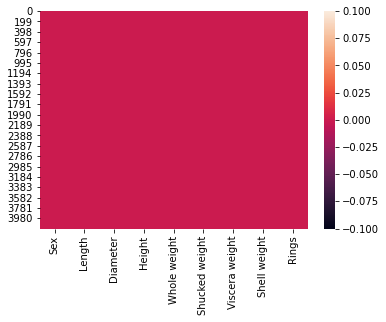

In [16]:
sns.heatmap(df.isnull())  #checking  the null vale or not by Visulization 

In [17]:
#check duplicate data
df.duplicated().sum()

0

In [18]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

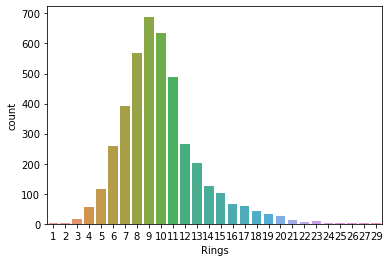

In [19]:
sns.countplot(df["Rings"])

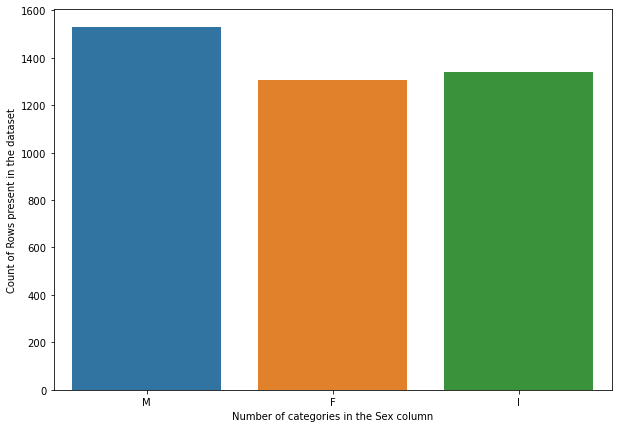

In [20]:
# count plot
plt.figure(figsize=(10,7))
sns.countplot(x ='Sex', data =df)
plt.xlabel('Number of categories in the Sex column')
plt.ylabel('Count of Rows present in the dataset')
plt.show()

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

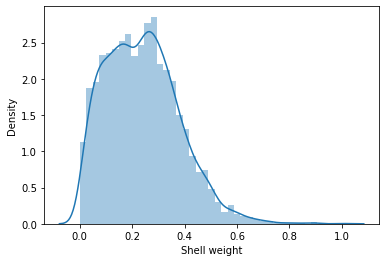

In [21]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

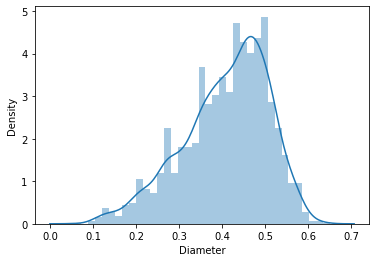

In [22]:
sns.distplot(df['Diameter'])

In [23]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [24]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [25]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:xlabel='Height', ylabel='Density'>

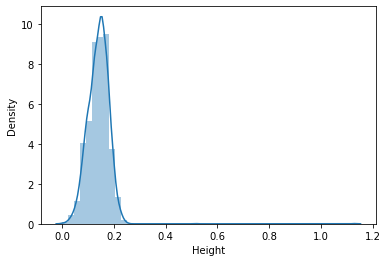

In [26]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

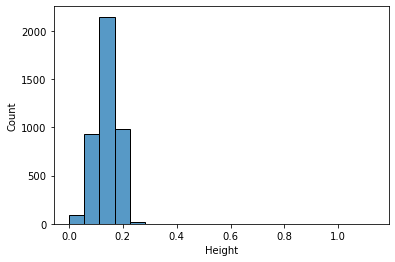

In [27]:
sns.histplot(df['Height'],bins=20)

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

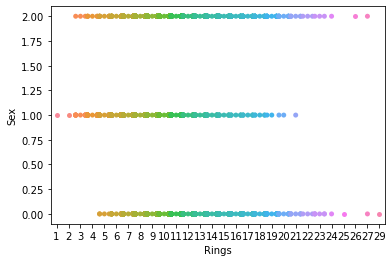

In [28]:
sns.swarmplot(y='Sex',x='Rings',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Length'>

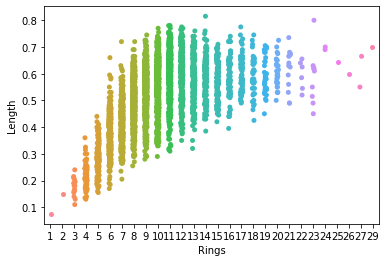

In [29]:
sns.stripplot(y='Length',x='Rings',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Whole weight'>

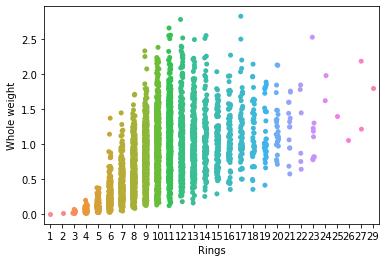

In [30]:
sns.stripplot(y='Whole weight',x='Rings',data=df)

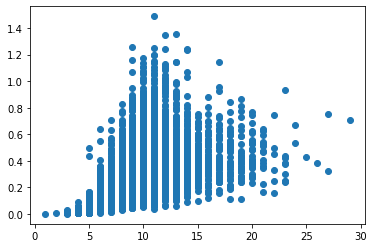

In [31]:
plt.scatter(y='Shucked weight',x='Rings',data=df)

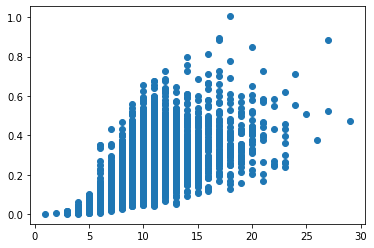

In [32]:
plt.scatter(y='Shell weight',x='Rings',data=df)

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

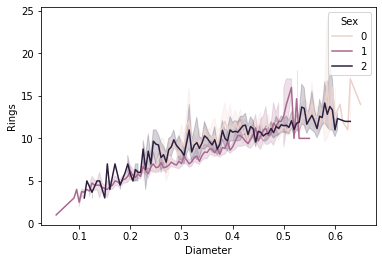

In [33]:
sns.lineplot(x='Diameter',y='Rings',data=df, hue ='Sex')

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

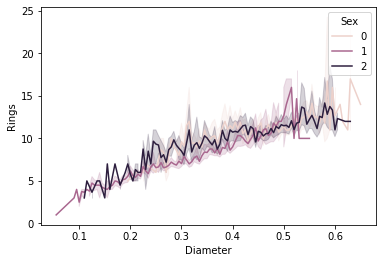

In [34]:
sns.lineplot(x='Diameter',y='Rings',data=df, hue ='Sex')

Sex                  AxesSubplot(0.125,0.125;0.0731132x0.755)
Length            AxesSubplot(0.212736,0.125;0.0731132x0.755)
Diameter          AxesSubplot(0.300472,0.125;0.0731132x0.755)
Height            AxesSubplot(0.388208,0.125;0.0731132x0.755)
Whole weight      AxesSubplot(0.475943,0.125;0.0731132x0.755)
Shucked weight    AxesSubplot(0.563679,0.125;0.0731132x0.755)
Viscera weight    AxesSubplot(0.651415,0.125;0.0731132x0.755)
Shell weight      AxesSubplot(0.739151,0.125;0.0731132x0.755)
Rings             AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

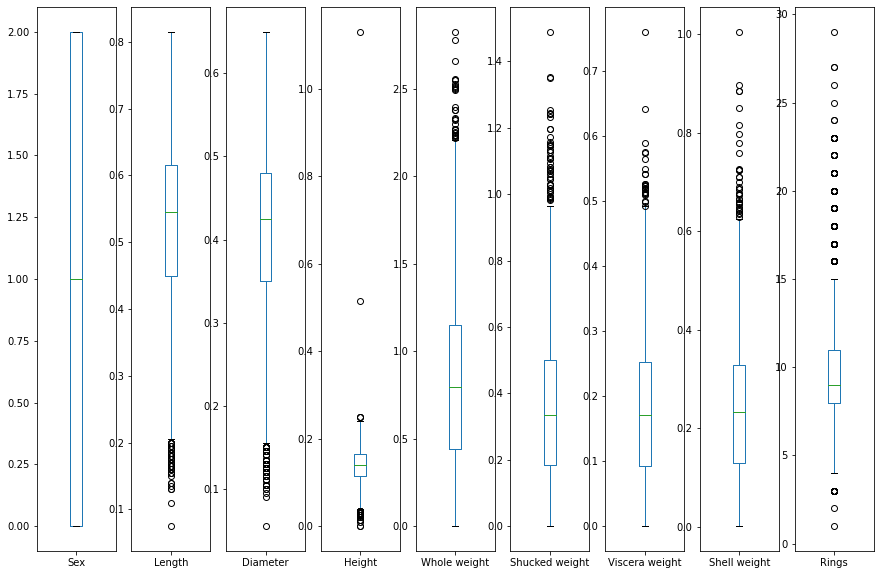

In [35]:
df.plot(kind='box',subplots=True,figsize=(15,10))

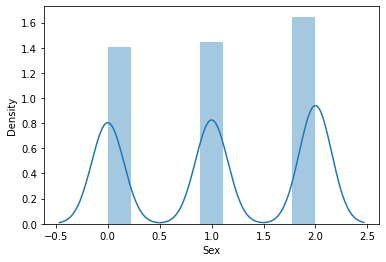

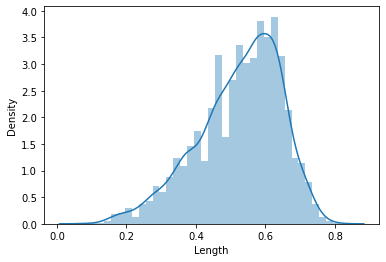

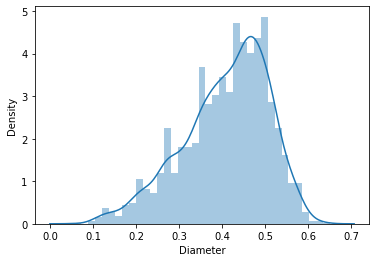

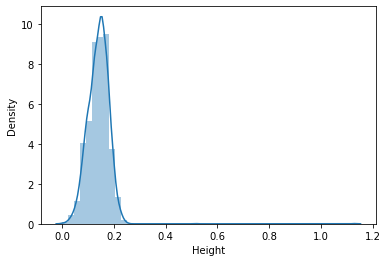

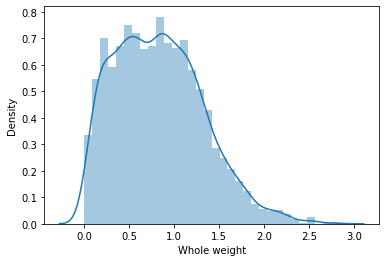

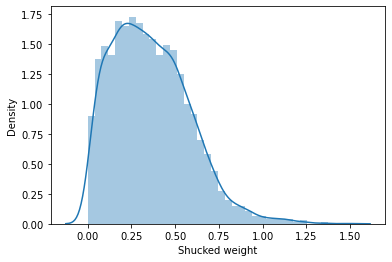

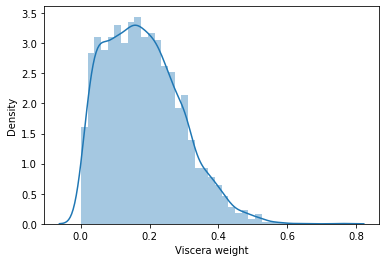

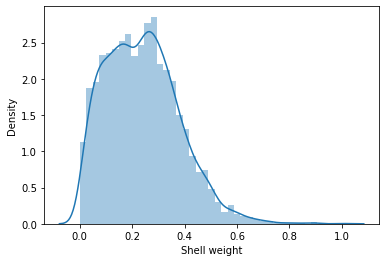

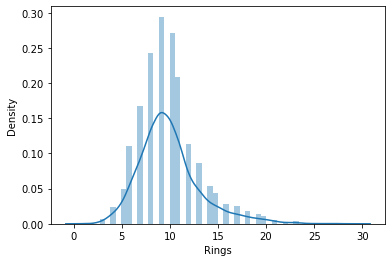

In [36]:
# distribution plot
for i in df.columns:
    sns.distplot(df[i])
    plt.subplot(111)
    plt.show()

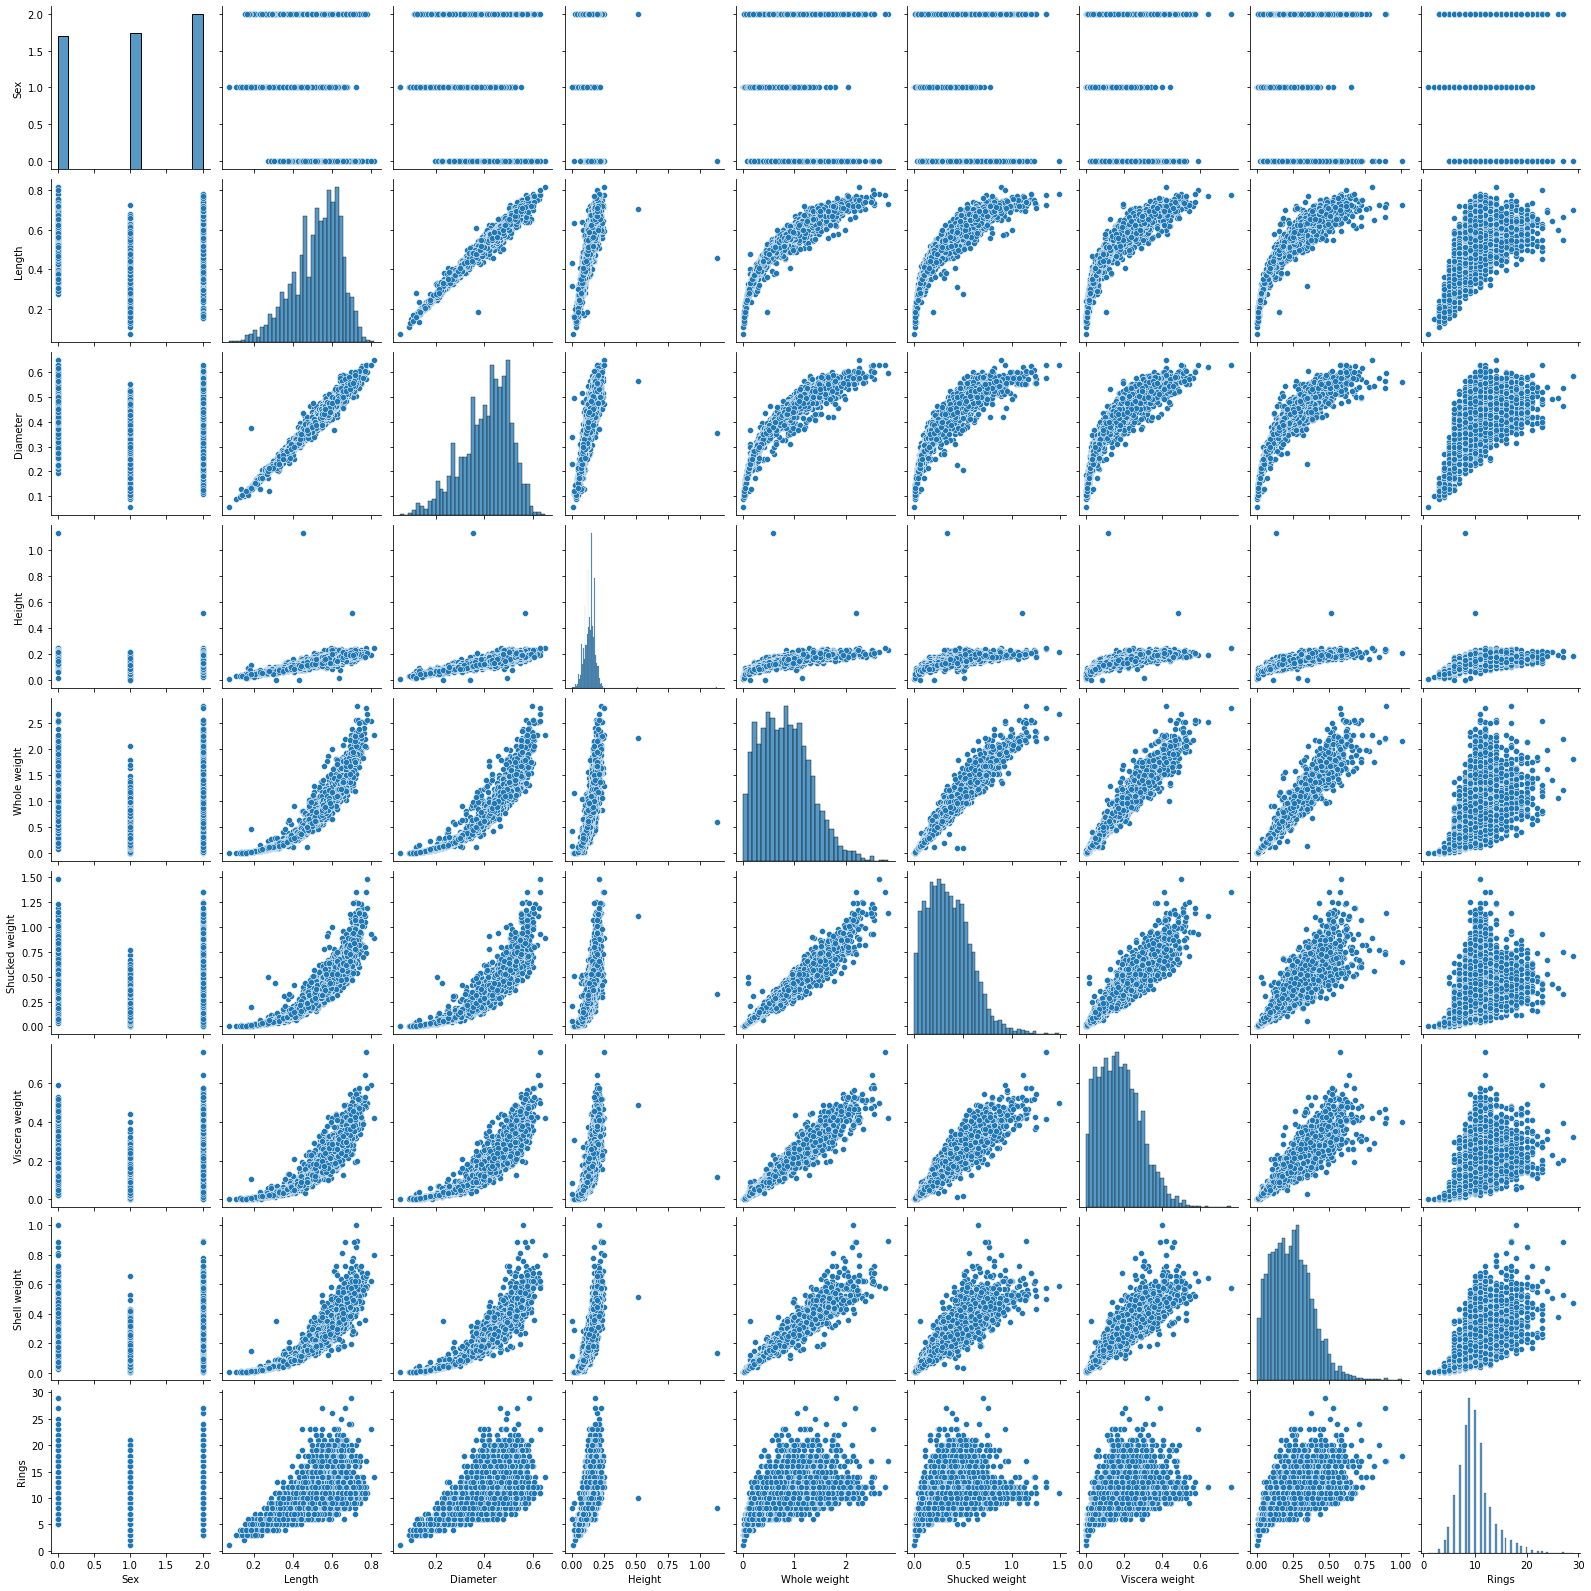

In [37]:
# pair plot
sns.pairplot(df)
plt.show()

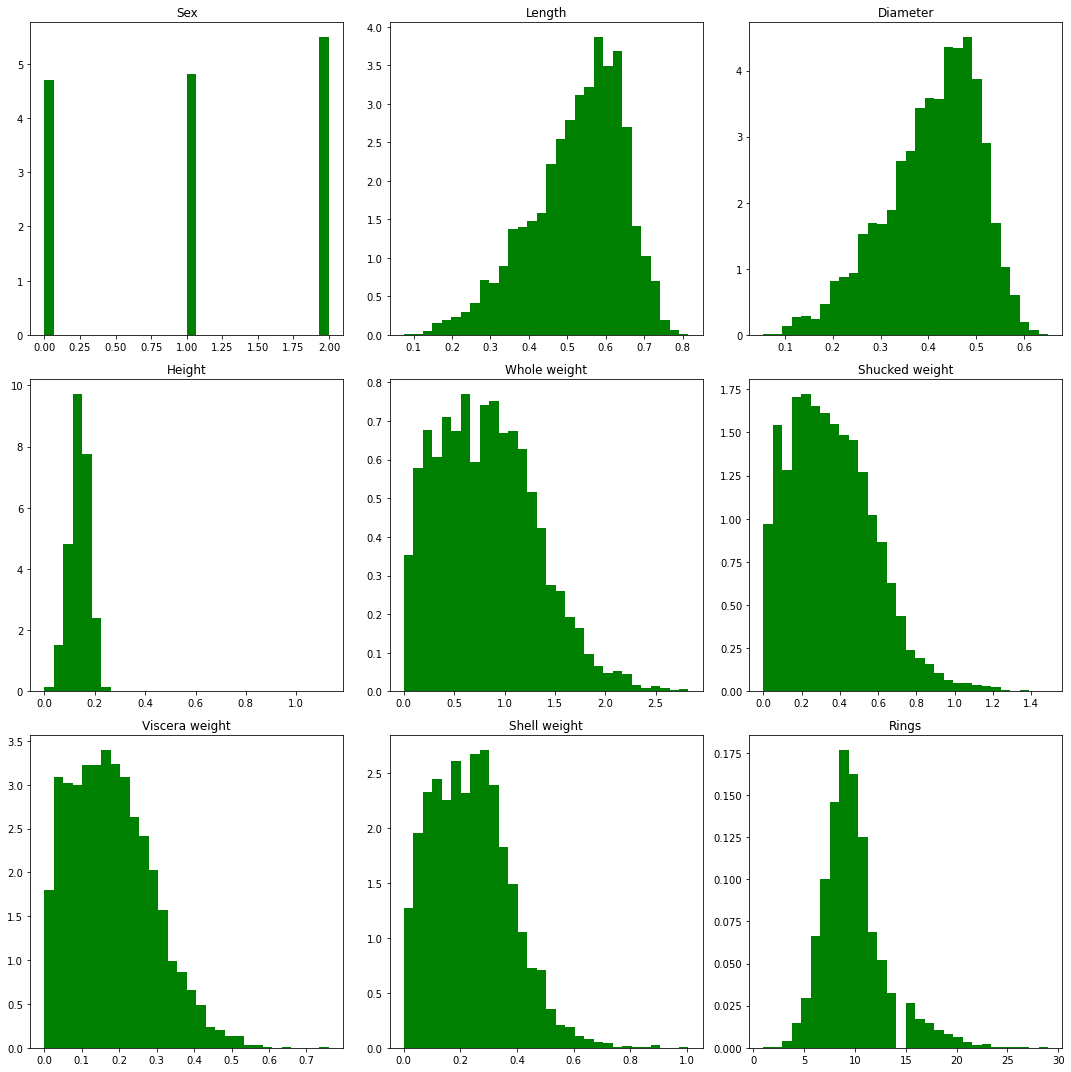

In [38]:
# histogram
plt.rcParams['figure.figsize'] = (15,15)
df.hist(bins=30, color='green', density=True, label='Value', histtype='stepfilled', grid=False)
plt.tight_layout()
plt.show()

In [39]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [40]:
corr=df.corr()
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


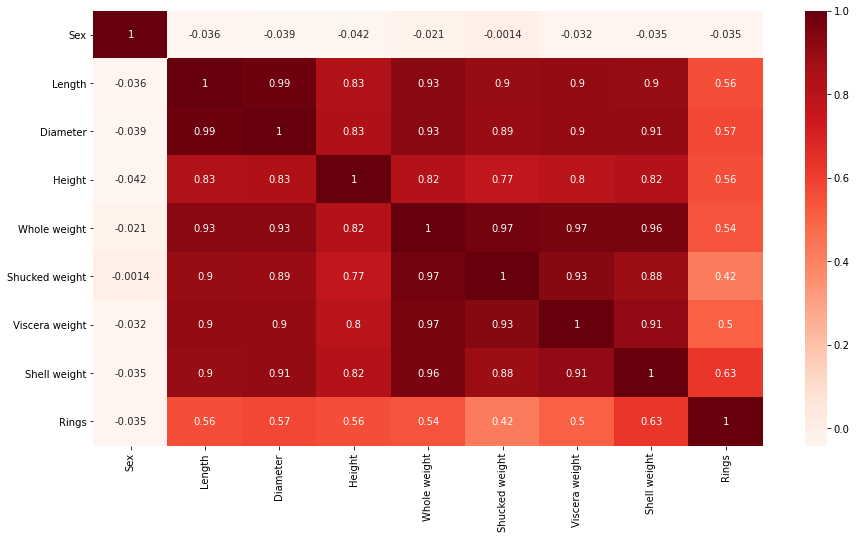

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap="Reds",annot=True)
plt.show()

In [42]:
z=abs(zscore(df))

In [43]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [81]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 7)
(4027, 7)


In [82]:
loss_percent=(4177-4027)/4177*100
print(loss_percent)

3.5910940866650707


In [46]:
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [47]:
x.shape

(4177, 8)

In [48]:
x.shape[1]

8

In [49]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [50]:
y.shape

(4177,)

In [51]:
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [52]:
vif_cal()

   VIF Factor        features
0    2.555356             Sex
1  700.488988          Length
2  749.121626        Diameter
3   42.128924          Height
4  421.652484    Whole weight
5  101.674946  Shucked weight
6   63.585627  Viscera weight
7   81.873737    Shell weight


In [53]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [54]:
df.skew()

Sex              -0.098155
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [55]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [56]:
x=df.iloc[:,:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [57]:
x.shape

(4177, 6)

In [58]:
vif_cal()

   VIF Factor        features
0    2.532536             Sex
1   46.978990        Diameter
2   41.650431          Height
3  123.993316    Whole weight
4   59.292682  Viscera weight
5   49.403495    Shell weight


In [59]:
x=df.iloc[:,0:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


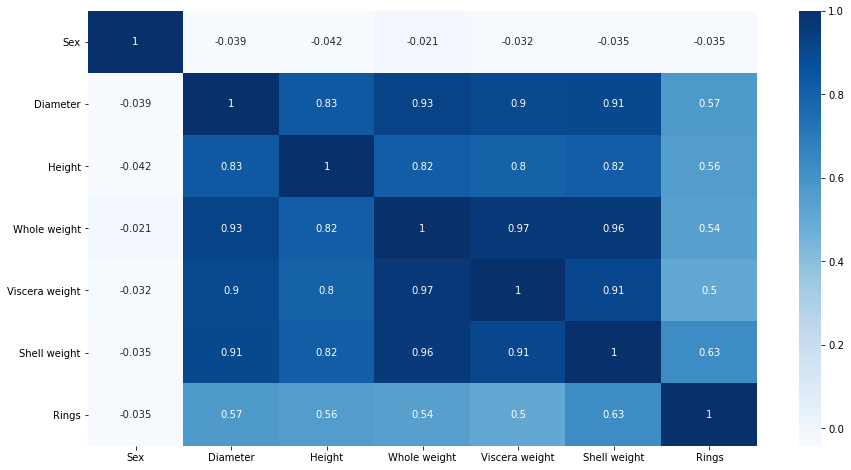

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

In [61]:
x=df.iloc[:,0:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [62]:
x.shape

(4177, 6)

In [63]:
y.shape

(4177,)

In [64]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15198011, -0.43214879, -1.06442415, -0.64189823, -0.72621157,
        -0.63821689],
       [ 1.15198011, -1.439929  , -1.18397831, -1.23027711, -1.20522124,
        -1.21298732],
       [-1.28068972,  0.12213032, -0.10799087, -0.30946926, -0.35668983,
        -0.20713907],
       ...,
       [ 1.15198011,  0.67640943,  1.56576738,  0.70821206,  0.97541324,
         0.49695471],
       [-1.28068972,  0.77718745,  0.25067161,  0.54199757,  0.73362741,
         0.41073914],
       [ 1.15198011,  1.48263359,  1.32665906,  2.28368063,  1.78744868,
         1.84048058]])

In [65]:
x.shape

(4177, 6)

In [66]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [67]:
# traing and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [68]:
# Regression Model Function
def reg(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
    # Training the model
    model.fit(x_train, y_train)
    # Predicting Y_test
    pred = model.predict(x_test)
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2) 
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [69]:
# Linear Regression Model
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 2.4703088511459885
R2 Score is: 46.95725902543471
Cross Validation Score: 32.22496514465313
R2 Score - Cross Validation Score is 14.732293880781576


In [70]:
# Support Vector Regression
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x, y)

RMSE Score is: 2.7914724785508587
R2 Score is: 32.26858478904268
Cross Validation Score: -1555.3477999937968
R2 Score - Cross Validation Score is 1587.6163847828395


In [71]:
# Random Forest Regressor
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 2.6859201586912493
R2 Score is: 37.29392080195299
Cross Validation Score: 20.86171671873814
R2 Score - Cross Validation Score is 16.432204083214852


In [72]:
# K Neighbors Regressor
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, x, y)

RMSE Score is: 2.679983160875763
R2 Score is: 37.57082732199309
Cross Validation Score: 20.789903688232975
R2 Score - Cross Validation Score is 16.780923633760118


In [73]:
 #SGD Regressor
model=SGDRegressor(penalty='l1', max_iter=2000, learning_rate='optimal')
reg(model, x, y)

RMSE Score is: 10.779902326595373
R2 Score is: -910.0737875536181
Cross Validation Score: -1.5148861255299928
R2 Score - Cross Validation Score is -908.5589014280881


In [74]:
# Gradient Boosting Regressor
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, x, y)

RMSE Score is: 3.2896982780086934
R2 Score is: 5.933370276566707
Cross Validation Score: -91.22442184594698
R2 Score - Cross Validation Score is 97.15779212251368


In [75]:
# Ada Boost Regressor
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, x, y)

RMSE Score is: 2.8331004208146444
R2 Score is: 30.23342767356216
Cross Validation Score: -31.14026210612223
R2 Score - Cross Validation Score is 61.37368977968439


In [76]:
# Choosing Support Vector Regression
fmod_param = {'kernel' : ['poly', 'sigmoid', 'rbf'], 
              'C' : [2.0, 3.0, 4.0], 
              'gamma' : ['scale', 'auto'], 
              'epsilon' : [0.2, 0.3, 0.4], 
              'shrinking' : [True, False]}

In [77]:
GSCV = GridSearchCV(SVR(), fmod_param, cv=5)

In [84]:
Final_Model = SVR(C=4.0, epsilon=0.4, gamma='scale', kernel='rbf', shrinking=True)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 47.180779672601304


In [86]:
import joblib
joblib.dump(Final_Model,"AbaloneProject.pkl")

['AbaloneProject.pkl']